## Import kaggle.json dan konfigurasi



In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alyanuroktapiani","key":"be24f7d2ec81f0cf4bbc7da9875bd6ae"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


## Download datasets

In [3]:
!kaggle datasets download -d abhia1999/chronic-kidney-disease

  0% 0.00/5.61k [00:00<?, ?B/s]
100% 5.61k/5.61k [00:00<00:00, 10.2MB/s]


## Buat folder

In [4]:
!mkdir chronic-kidney-disease
!unzip chronic-kidney-disease.zip -d chronic-kidney-disease
!ls chronic-kidney-disease

Archive:  chronic-kidney-disease.zip
  inflating: chronic-kidney-disease/new_model.csv  
new_model.csv


## Abaikan warning

In [5]:
import warnings

warnings.filterwarnings("ignore")

## Data preprocessing

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("chronic-kidney-disease/new_model.csv")

In [8]:
data.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [9]:
data[data["Class"] == 0].head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
250,80.0,1.025,0.0,0.0,1.0,10.0,1.2,135.0,5.0,15.0,10400.0,4.5,0.0,0
251,80.0,1.025,0.0,0.0,1.0,36.0,1.0,150.0,4.6,17.0,9800.0,5.0,0.0,0
252,80.0,1.025,0.0,0.0,1.0,49.0,0.6,147.0,4.4,15.9,9100.0,4.7,0.0,0
253,80.0,1.025,0.0,0.0,1.0,17.0,1.2,135.0,4.7,15.4,6200.0,6.2,0.0,0
254,60.0,1.025,0.0,0.0,1.0,38.0,0.8,135.0,3.7,13.0,8300.0,5.2,0.0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [11]:
data.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [24]:
data.nunique()

Bp        11
Sg         5
Al         6
Su         6
Rbc        2
Bu       118
Sc        85
Sod       35
Pot       41
Hemo     116
Wbcc      90
Rbcc      46
Htn        3
Class      2
dtype: int64

## Heatmap data null

<Axes: >

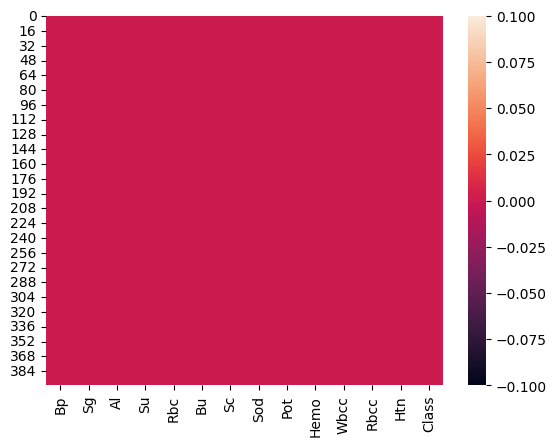

In [12]:
sns.heatmap(data.isnull())

## Korelasi matrix antar kolom

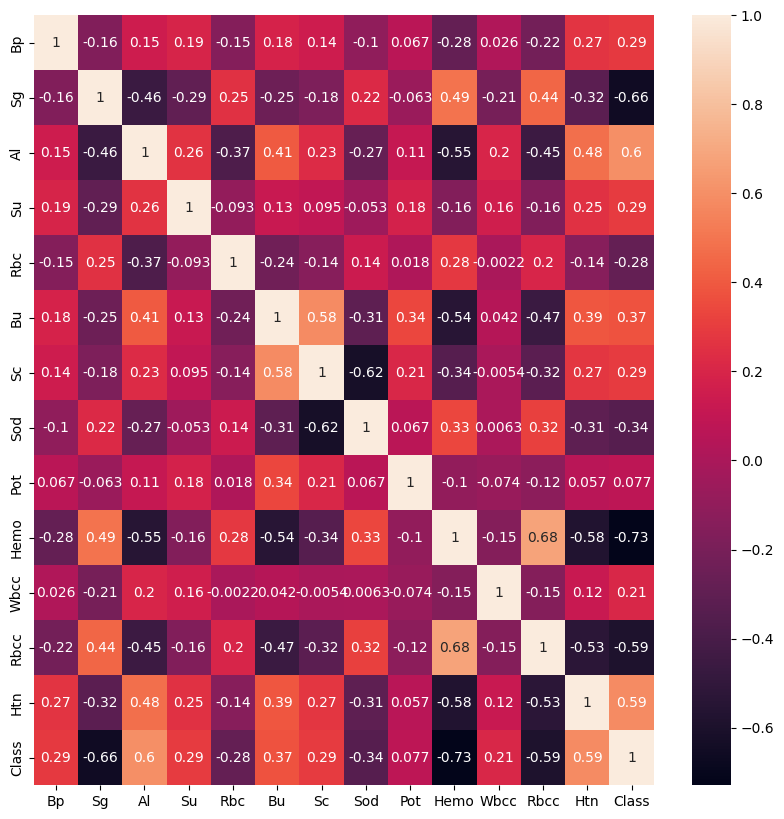

In [13]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

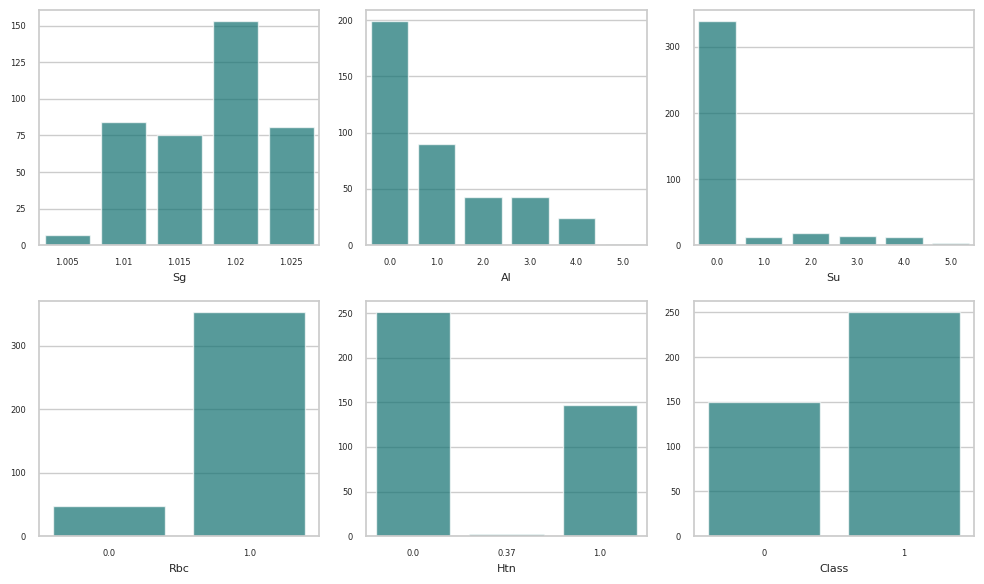

In [14]:
categorical_columns = ['Sg', 'Al', 'Su', 'Rbc', 'Htn', 'Class']

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
for i, cat_var in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=cat_var, color='Teal', alpha=0.7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(cat_var, fontsize=8)
    plt.ylabel('')

plt.tight_layout()
plt.show()

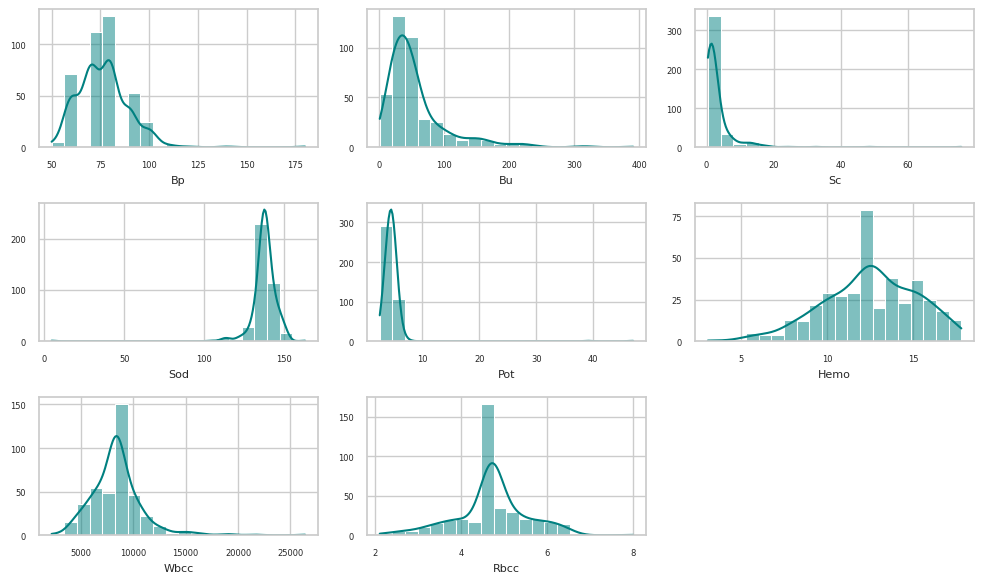

In [15]:
numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=var, kde=True, bins=20, color='Teal')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

## Feature dan label


In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

## Library *sklearn*

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
model = LogisticRegression(max_iter=500)

In [55]:
model.fit(X_train, y_train)
X_pred = model.predict(X_test)

In [44]:
X_train.shape, y_train.shape

((320, 13), (320,))

In [57]:
accuracy = accuracy_score(X_pred, y_test)
print("Skor akurasi:", accuracy)

Skor akurasi: 0.975


In [52]:
# Contoh data pasien terkena penyakit ginjal
# input_data =  np.array([70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0])
# Contoh data pasien tidak terkena penyakit ginjal
input_data = np.array([80.0,1.025,0.0,0.0,1.0,10.0,1.2,135.0,5.0,15.0,10400.0,4.5,0.0])

input_data_reshaped = input_data.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 1) :
    print("Pasien terkena penyakit ginjal kronis")
else :
    print("Pasien tidak terkena penyakit ginjal kronis")

[0]
Pasien tidak terkena penyakit ginjal kronis


## Save Model

In [53]:
import pickle

filename = 'chronic-kidney.sav'
pickle.dump(model, open(filename, 'wb'))

## Metrik evaluasi precision dan recall

In [54]:
precision= precision_score(y_test,y_pred)
recall= recall_score(y_test,y_pred)

print("Precision dari logistic regression: ", precision)
print("Recall dari logistic regression :", recall)

Precision dari logistic regression:  1.0
Recall dari logistic regression : 0.9607843137254902
